# Predicting Co2 Emission per Capita

The CO2 Emission Per Capita Prediction project aims to develop a data-driven solution that accurately forecasts carbon dioxide (CO2) emissions on a per capita basis for different regions or countries. The project seeks to leverage historical emissions data, socio-economic indicators, and potentially other relevant variables to create a predictive model capable of estimating future emissions per person. The ultimate goal is to gain insights into emission trends, identify factors influencing emissions, and aid policymakers in making informed decisions to mitigate climate change.

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

The dataset contains monthly observations of environmental, atmospheric, and socio-economic attributes, including greenhouse gases like CO2, CH4, and N2O, as well as MEI for El Niño analysis. It also includes CFC-11 and CFC-12 data, TSI for solar irradiance, aerosols, temperature, population, and CO2 emissions per capita.

In [3]:
dataframe = pd.read_csv('carbon-segment.csv')

# Data Processing 

After acquiring the dataset, we will perform data preprocessing to clean and prepare the data for analysis. This includes handling missing values, removing duplicates, and transforming categorical variables into numerical representations using techniques like one-hot encoding or label encoding.

In [4]:
dataframe.head()

Year  Month    MEI     CO2      CH4      N2O   CFC-11   CFC-12        TSI  \
0  1983     12 -0.176  343.07  1654.31  304.082  196.609  362.174  1366.0607   
1  1984     12 -0.611  344.54  1672.15  305.313  207.308  372.701  1365.7617   
2  1985     12 -0.293  345.82  1677.99  305.653  217.326  394.539  1365.6794   
3  1986     12  1.183  347.15  1698.08  306.612  229.058  411.112  1365.6717   
4  1987     12  1.251  349.18  1708.14  306.503  240.058  436.000  1366.0350   

   Aerosols   Temp  Population  CO2emissionspercapita  
0    0.0486  0.078  4699569304                   4.11  
1    0.0188 -0.282  4784011621                   4.16  
2    0.0122 -0.002  4870921740                   4.14  
3    0.0120  0.022  4960567912                   4.14  
4    0.0089  0.314  5052522147                   4.20

In [5]:
dataframe.tail()

Year  Month    MEI     CO2      CH4      N2O   CFC-11   CFC-12        TSI  \
21  2004     12  0.643  377.45  1797.24  318.825  252.754  542.172  1366.1552   
22  2005     12 -0.585  379.92  1798.89  319.688  250.989  541.799  1365.8549   
23  2006     12  0.951  381.79  1795.04  320.451  248.480  539.377  1365.7087   
24  2007     12 -1.168  383.89  1805.58  321.217  246.261  537.052  1365.6927   
25  2008     12 -0.666  385.56  1812.88  322.182  244.204  535.005  1365.6926   

    Aerosols   Temp  Population  CO2emissionspercapita  
21    0.0027  0.381  6461159389                   4.45  
22    0.0036  0.366  6541907027                   4.55  
23    0.0054  0.518  6623517833                   4.64  
24    0.0040  0.226  6705946610                   4.76  
25    0.0046  0.330  6789088686                   4.73

In [6]:
dataframe.shape

(26, 13)

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   26 non-null     int64  
 1   Month                  26 non-null     int64  
 2   MEI                    26 non-null     float64
 3   CO2                    26 non-null     float64
 4   CH4                    26 non-null     float64
 5   N2O                    26 non-null     float64
 6   CFC-11                 26 non-null     float64
 7   CFC-12                 26 non-null     float64
 8   TSI                    26 non-null     float64
 9   Aerosols               26 non-null     float64
 10  Temp                   26 non-null     float64
 11  Population             26 non-null     int64  
 12  CO2emissionspercapita  26 non-null     float64
dtypes: float64(10), int64(3)
memory usage: 2.8 KB


In [8]:
dataframe.isna().sum().any()

False

In [9]:
dataframe.isna().any()

Year                     False
Month                    False
MEI                      False
CO2                      False
CH4                      False
N2O                      False
CFC-11                   False
CFC-12                   False
TSI                      False
Aerosols                 False
Temp                     False
Population               False
CO2emissionspercapita    False
dtype: bool

In [10]:
dataframe.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp', 'Population', 'CO2emissionspercapita'],
      dtype='object')

# Visualizing Co2 Emission in Different Interval Of Time

From the diagram below we can see that the emission of Co2 has increased rapidly in last 15 years.

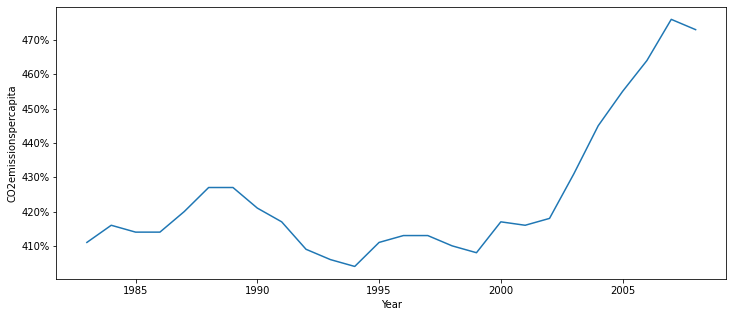

In [16]:
plt.rcParams['figure.figsize'] = [12, 5]

ax = sns.lineplot(data = dataframe, x = 'Year', y = 'CO2emissionspercapita')

from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Statical Info

Statistical information refers to numerical data or metrics that describe various aspects of a dataset or population. These statistics provide quantitative measures of central tendency, dispersion, relationships, and other properties of the data.

In [17]:
dataframe.describe()

Year  Month        MEI         CO2          CH4         N2O  \
count    26.000000   26.0  26.000000   26.000000    26.000000   26.000000   
mean   1995.500000   12.0   0.131692  362.921538  1761.152692  312.783731   
std       7.648529    0.0   0.943217   12.959837    45.944775    5.410247   
min    1983.000000   12.0  -1.343000  343.070000  1654.310000  304.082000   
25%    1989.250000   12.0  -0.584000  353.197500  1735.352500  308.725250   
50%    1995.500000   12.0   0.072500  361.395000  1775.975000  311.893000   
75%    2001.750000   12.0   0.874250  373.077500  1796.202500  317.131250   
max    2008.000000   12.0   2.320000  385.560000  1812.880000  322.182000   

           CFC-11      CFC-12          TSI   Aerosols       Temp  \
count   26.000000   26.000000    26.000000  26.000000  26.000000   
mean   252.469577  499.406577  1366.098115   0.016769   0.224462   
std     20.039295   57.564628     0.419458   0.030214   0.187143   
min    196.609000  362.174000  1365.640200   0.002100  -0.282000   
25%    246.815750  478.891000  1365.706150   0.002925   0.107250   
50%    258.714000  529.848000  1365.989350   0.005700   0.212500   
75%    267.087750  540.406000  1366.349750   0.012150   0.336000   
max    271.494000  543.419000  1366.949200   0.138500   0.526000   

         Population  CO2emissionspercapita  
count  2.600000e+01              26.000000  
mean   5.766520e+09               4.244615  
std    6.351239e+08               0.206266  
min    4.699569e+09               4.040000  
25%    5.259889e+09               4.115000  
50%    5.784552e+09               4.165000  
75%    6.281987e+09               4.270000  
max    6.789089e+09               4.760000

# Correlation Matrix

A correlation matrix is a table that shows the pairwise correlations between variables in a dataset. Each cell in the table represents the correlation between two variables, and the strength and direction of the correlation is indicated by the color and magnitude of the cell.

Correlation matrices are commonly used in data analysis to identify relationships between variables and to help understand the structure of the data. The values in the correlation matrix range from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

In [18]:
corr_matrix = dataframe.corr()

In [19]:
corr_matrix

Year  Month       MEI       CO2       CH4  \
Year                   1.000000    NaN -0.120235  0.996468  0.919019   
Month                       NaN    NaN       NaN       NaN       NaN   
MEI                   -0.120235    NaN  1.000000 -0.143940 -0.065620   
CO2                    0.996468    NaN -0.143940  1.000000  0.892215   
CH4                    0.919019    NaN -0.065620  0.892215  1.000000   
N2O                    0.996096    NaN -0.134603  0.997846  0.898145   
CFC-11                 0.419276    NaN  0.163090  0.362871  0.722420   
CFC-12                 0.861932    NaN  0.010181  0.825592  0.981221   
TSI                    0.078423    NaN -0.075435  0.069089  0.186603   
Aerosols              -0.340784    NaN  0.290140 -0.352806 -0.261628   
Temp                   0.721911    NaN  0.204414  0.718282  0.721507   
Population             0.999652    NaN -0.114456  0.994463  0.928396   
CO2emissionspercapita  0.648312    NaN -0.220075  0.701557  0.389714   

                            N2O    CFC-11    CFC-12       TSI  Aerosols  \
Year                   0.996096  0.419276  0.861932  0.078423 -0.340784   
Month                       NaN       NaN       NaN       NaN       NaN   
MEI                   -0.134603  0.163090  0.010181 -0.075435  0.290140   
CO2                    0.997846  0.362871  0.825592  0.069089 -0.352806   
CH4                    0.898145  0.722420  0.981221  0.186603 -0.261628   
N2O                    1.000000  0.375138  0.832338  0.092810 -0.323711   
CFC-11                 0.375138  1.000000  0.814453  0.276913  0.036161   
CFC-12                 0.832338  0.814453  1.000000  0.232667 -0.207960   
TSI                    0.092810  0.276913  0.232667  1.000000 -0.116439   
Aerosols              -0.323711  0.036161 -0.207960 -0.116439  1.000000   
Temp                   0.701529  0.425829  0.708054  0.175297 -0.403628   
Population             0.994446  0.442534  0.874584  0.083694 -0.333378   
CO2emissionspercapita  0.684825 -0.136941  0.287690 -0.231023 -0.242181   

                           Temp  Population  CO2emissionspercapita  
Year                   0.721911    0.999652               0.648312  
Month                       NaN         NaN                    NaN  
MEI                    0.204414   -0.114456              -0.220075  
CO2                    0.718282    0.994463               0.701557  
CH4                    0.721507    0.928396               0.389714  
N2O                    0.701529    0.994446               0.684825  
CFC-11                 0.425829    0.442534              -0.136941  
CFC-12                 0.708054    0.874584               0.287690  
TSI                    0.175297    0.083694              -0.231023  
Aerosols              -0.403628   -0.333378              -0.242181  
Temp                   1.000000    0.724261               0.360749  
Population             0.724261    1.000000               0.636049  
CO2emissionspercapita  0.360749    0.636049               1.000000

<AxesSubplot:>

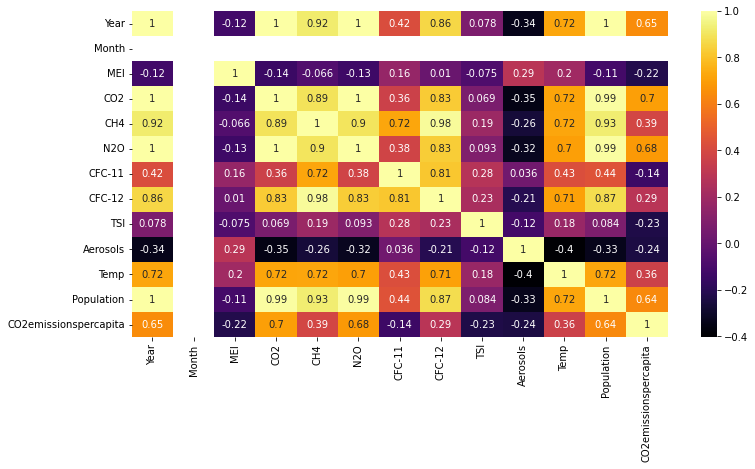

In [20]:
plt.figure(figsize = (12, 6))
sns.heatmap(corr_matrix, 
            annot = True, 
            cmap = 'inferno')

# Correlation Of Co2 Emission With Different Attributes

In [22]:
dataframe.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp', 'Population', 'CO2emissionspercapita'],
      dtype='object')

In [24]:
dataset = dataframe.drop('CO2emissionspercapita', axis = 1)

In [25]:
dataset.head()

Year  Month    MEI     CO2      CH4      N2O   CFC-11   CFC-12        TSI  \
0  1983     12 -0.176  343.07  1654.31  304.082  196.609  362.174  1366.0607   
1  1984     12 -0.611  344.54  1672.15  305.313  207.308  372.701  1365.7617   
2  1985     12 -0.293  345.82  1677.99  305.653  217.326  394.539  1365.6794   
3  1986     12  1.183  347.15  1698.08  306.612  229.058  411.112  1365.6717   
4  1987     12  1.251  349.18  1708.14  306.503  240.058  436.000  1366.0350   

   Aerosols   Temp  Population  
0    0.0486  0.078  4699569304  
1    0.0188 -0.282  4784011621  
2    0.0122 -0.002  4870921740  
3    0.0120  0.022  4960567912  
4    0.0089  0.314  5052522147

<AxesSubplot:title={'center':'Correlation With Co2 Emission Per Capita'}>

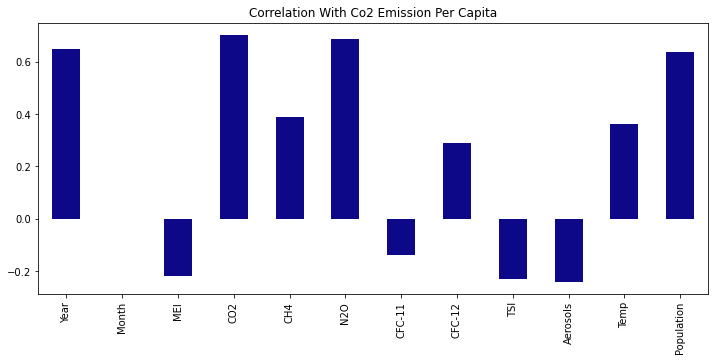

In [26]:
dataset.corrwith(dataframe['CO2emissionspercapita']).plot.bar(
    title = 'Correlation With Co2 Emission Per Capita', 
    figsize = (12, 5), 
    cmap = 'plasma'
)

In [27]:
dataframe.head()

Year  Month    MEI     CO2      CH4      N2O   CFC-11   CFC-12        TSI  \
0  1983     12 -0.176  343.07  1654.31  304.082  196.609  362.174  1366.0607   
1  1984     12 -0.611  344.54  1672.15  305.313  207.308  372.701  1365.7617   
2  1985     12 -0.293  345.82  1677.99  305.653  217.326  394.539  1365.6794   
3  1986     12  1.183  347.15  1698.08  306.612  229.058  411.112  1365.6717   
4  1987     12  1.251  349.18  1708.14  306.503  240.058  436.000  1366.0350   

   Aerosols   Temp  Population  CO2emissionspercapita  
0    0.0486  0.078  4699569304                   4.11  
1    0.0188 -0.282  4784011621                   4.16  
2    0.0122 -0.002  4870921740                   4.14  
3    0.0120  0.022  4960567912                   4.14  
4    0.0089  0.314  5052522147                   4.20

# Splitting Dataset

Splitting a dataset refers to the process of dividing a given dataset into two or more subsets for training and evaluation purposes. The most common type of split is between the training set and the testing (or validation) set. This division allows us to assess the performance of a machine learning model on unseen data and evaluate its generalization capabilities.

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [28]:
x = dataframe.drop('CO2emissionspercapita', axis = 1)
y = dataframe['CO2emissionspercapita']

In [29]:
x.shape, y.shape

((26, 12), (26,))

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [33]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20, 12), (6, 12), (20,), (6,))

# Model Selection And Training

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()

In [39]:
model.fit(x_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(x_test)

In [41]:
y_pred

array([3.97851413, 4.08136919, 4.00006707, 4.69920992, 4.02488083,
       3.97830847])

In [42]:
model.score(x_test, y_test)

0.8259260446760603

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
model_rfg = RandomForestRegressor()

In [45]:
model_rfg.fit(x_train, y_train)

RandomForestRegressor()

In [46]:
y_pred_rfg = model_rfg.predict(x_test)

In [47]:
y_pred_rfg

array([4.1071, 4.2171, 4.1731, 4.6534, 4.1127, 4.1365])

In [48]:
model_rfg.score(x_test, y_test)

0.8783126953733812

# Thanks !